In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

## Reading the Data
The dataset is read from the `UCI_Real_Estate_Valuation.xlsx` file using the `pd.read_excel` function. The dataset is stored in the `data` variable.


In [44]:
data = pd.read_excel('./UCI_Real_Estate_Valuation.xlsx')

## Initial Data Exploration
- The first few rows of the dataset are displayed using the `head()` function.
- Information about the dataset is obtained using the `info()` function.


In [45]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Data Preprocessing
- The 'No' column is dropped from the dataset using the `drop()` function and assigning it back to `data`.


In [46]:
data = data.drop('No', axis=1)

## Selecting Features and Target Variable
This code creates the feature matrix `X` by dropping the column `Y house price of unit area` from the dataset. It also creates the target variable array `y` by selecting only the `Y house price of unit area` column from the dataset. The feature matrix `X` is created by selecting specific columns: `X2 house age`, `X3 distance to the nearest MRT station`, and `X4 number of convenience stores`.

In [47]:
X = data.drop('Y house price of unit area', axis=1)
y = data['Y house price of unit area']
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]

## Converting Date Format
This code converts the `X1 transaction date` column to datetime format using ***pd.to_datetime()***. It specifies the input format as `%Y.%m`.

In [48]:
data['X1 transaction date'] = pd.to_datetime(data['X1 transaction date'], format='%Y.%m', errors='coerce')
print(data['X1 transaction date'].isna().sum())  # Count of invalid entries

414


## Exploratory Data Analysis (EDA)

This code performs **exploratory data analysis** on the selected numeric variables: `X2 house age`, `X3 distance to the nearest MRT station`, and `X4 number of convenience stores`. It displays descriptive statistics using `data[num_vars].describe()`.

In [49]:
num_vars = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
data[num_vars].describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
count,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203
std,11.392485,1262.109595,2.945562
min,0.000000,23.382840,0.000000
25%,9.025000,289.324800,1.000000
50%,16.100000,492.231300,4.000000
75%,28.150000,1454.279000,6.000000
max,43.800000,6488.021000,10.000000


It also plots histograms for each variable using `data[num_vars].hist()`.

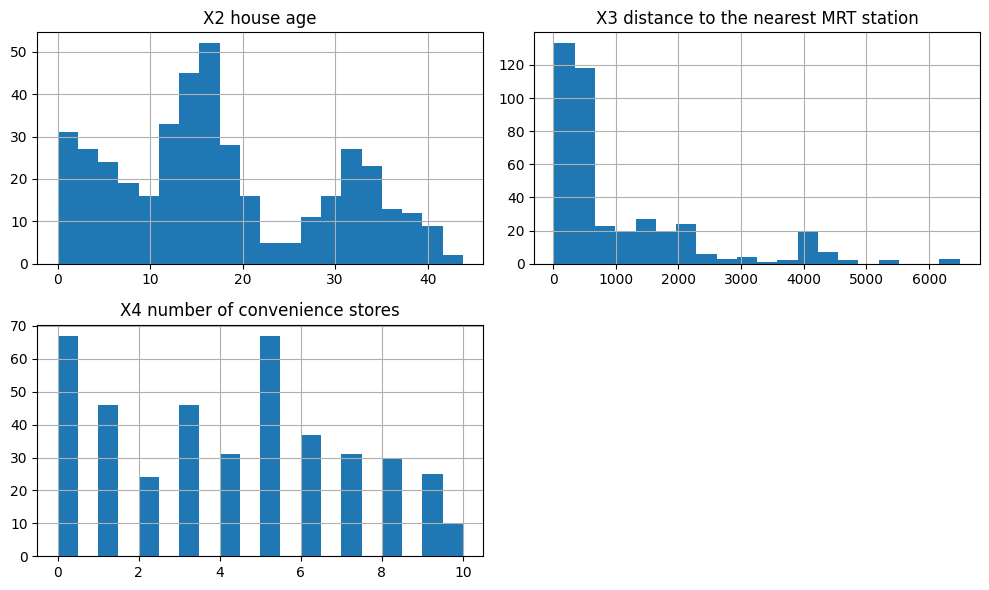

In [50]:
data[num_vars].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

## Correlation Matrix Heatmap
Displays a correlation matrix heatmap using `sns.heatmap()`

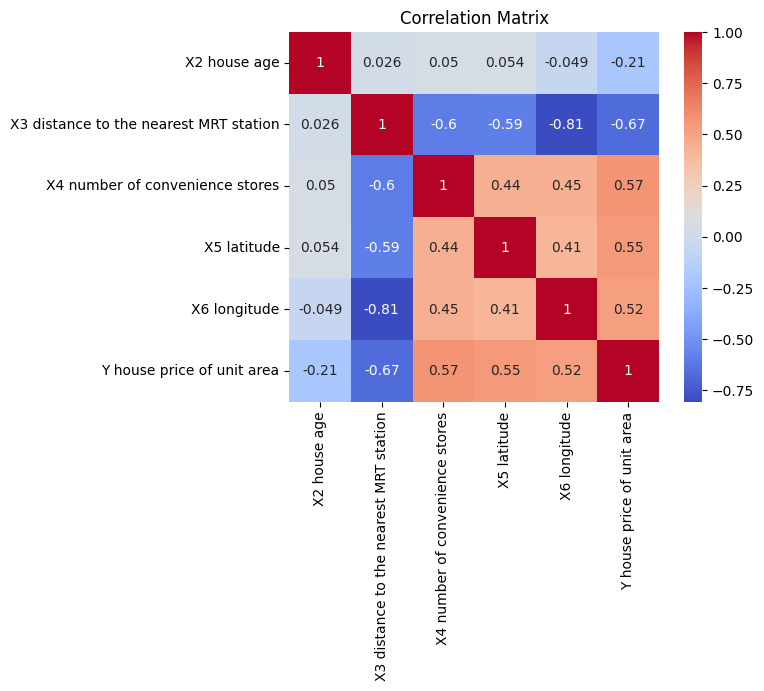

In [51]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Scatter Plots
Scatter plots of each variable against the target variable using `sns.pairplot()`.

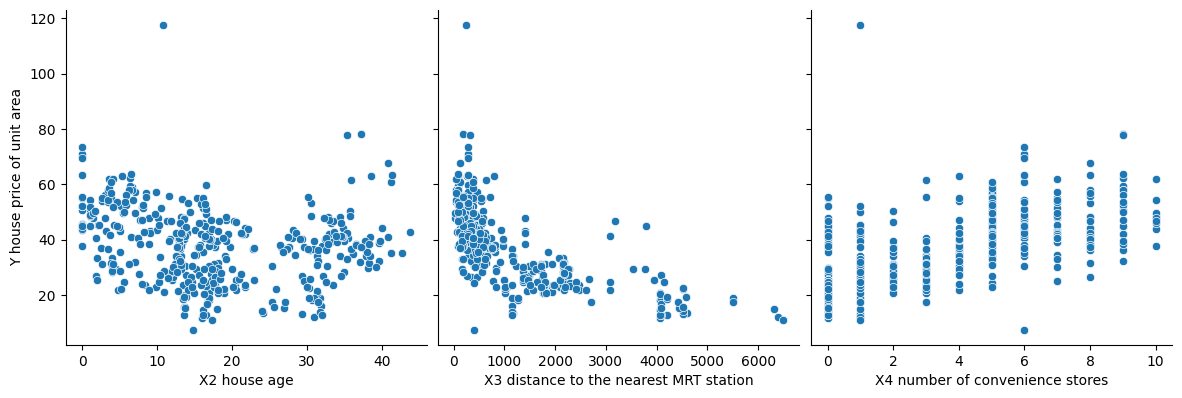

In [52]:
sns.pairplot(data, x_vars=num_vars, y_vars='Y house price of unit area', kind='scatter', height=4)
plt.show()

## Linear Regression Modeling and Evaluation

This code creates a Linear Regression model using `LinearRegression()`. It performs cross-validation using `cross_val_score()` to evaluate the model's performance with 5-fold cross-validation and negative mean squared error (RMSE) scoring. It calculates the mean RMSE and standard deviation of RMSE from the cross-validation scores.

In [53]:
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_mean_rmse = np.mean(cv_rmse_scores)
cv_std_rmse = np.std(cv_rmse_scores)

In [54]:
print('Cross-Validation RMSE Scores:', cv_rmse_scores)
print('Mean RMSE:', cv_mean_rmse)
print('Standard Deviation of RMSE:', cv_std_rmse)

Cross-Validation RMSE Scores: [ 7.80230461  9.5330571   8.02592789 12.1339604   7.92166832]
Mean RMSE: 9.08338366392503
Standard Deviation of RMSE: 1.6502838192493583


## Train-Test Split and Model Training
This code splits the dataset into training and testing sets using `train_test_split()` with a test size of 0.2 and a random state of 42. It then fits the Linear Regression model on the training data using `model.fit()`.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model.fit(X_train, y_train)

LinearRegression()

## Model Prediction and Evaluation
This code predicts the target variable for the test set using `model.predict()` and calculates various evaluation metrics such as Mean Squared Error (MSE), R-squared (R2), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) using respective functions.

In [57]:
y_pred = model.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [59]:
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 58.88825128983575
R-squared: 0.6489726933106557
Mean Absolute Error: 5.632384069009171
Root Mean Squared Error: 7.673868078735505


## Residual Analysis

In [60]:
residuals = y_test - y_pred

This code calculates the residuals by subtracting the predicted values from the actual values. It then creates a scatter plot of the predicted values against the residuals using `plt.scatter()`.

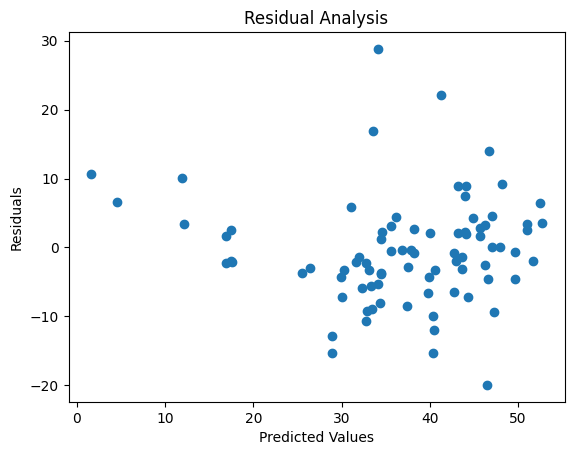

In [61]:
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

## Feature Importance

In [62]:
feature_importance = np.abs(model.coef_)
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)

This code calculates the absolute coefficients of the Linear Regression model using `model.coef_`. It assigns feature names to the coefficients and sorts them. It then creates a horizontal bar plot to visualize the feature importances using `plt.barh()`.

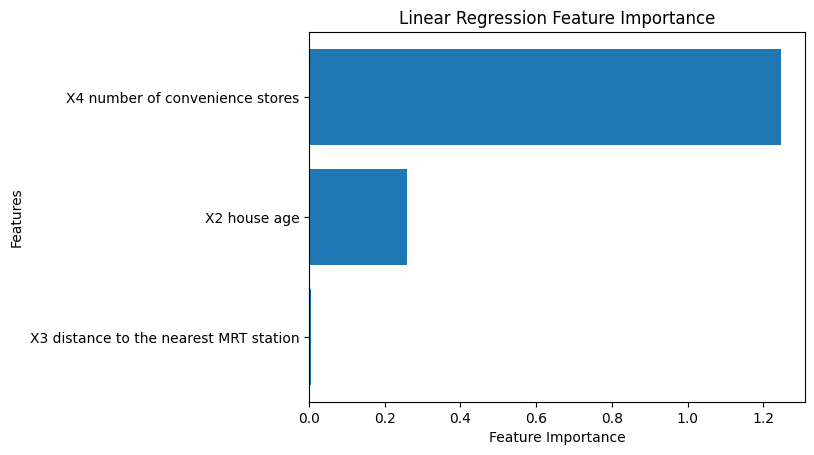

In [63]:
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Linear Regression Feature Importance')
plt.show()